# EXOPLANET DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


dirname = "/kaggle/input/exoplanets"
filename = "exoplanets.csv"
file_path = os.path.join(dirname, filename)


print(file_path)


/kaggle/input/exoplanets\exoplanets.csv


## IMPORT THE PACKAGES

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import *
import lightgbm as lgb
# Sklearn Evaluation Metrics
from sklearn import metrics

## Exception Handling

In [3]:

# Visualizes all the columns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## READ THE DATASET

In [27]:

df = pd.read_csv('exoplanets.csv')

# Print the shape of the dataset
print(df.shape)

# Select top of the dataset
df.head()

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [28]:
df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name          7205
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_steff_er

In [29]:
df['ExoplanetCandidate'] = df['koi_pdisposition'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)
df['ExoplanetConfirmed'] = df['koi_disposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

<Axes: ylabel='count'>

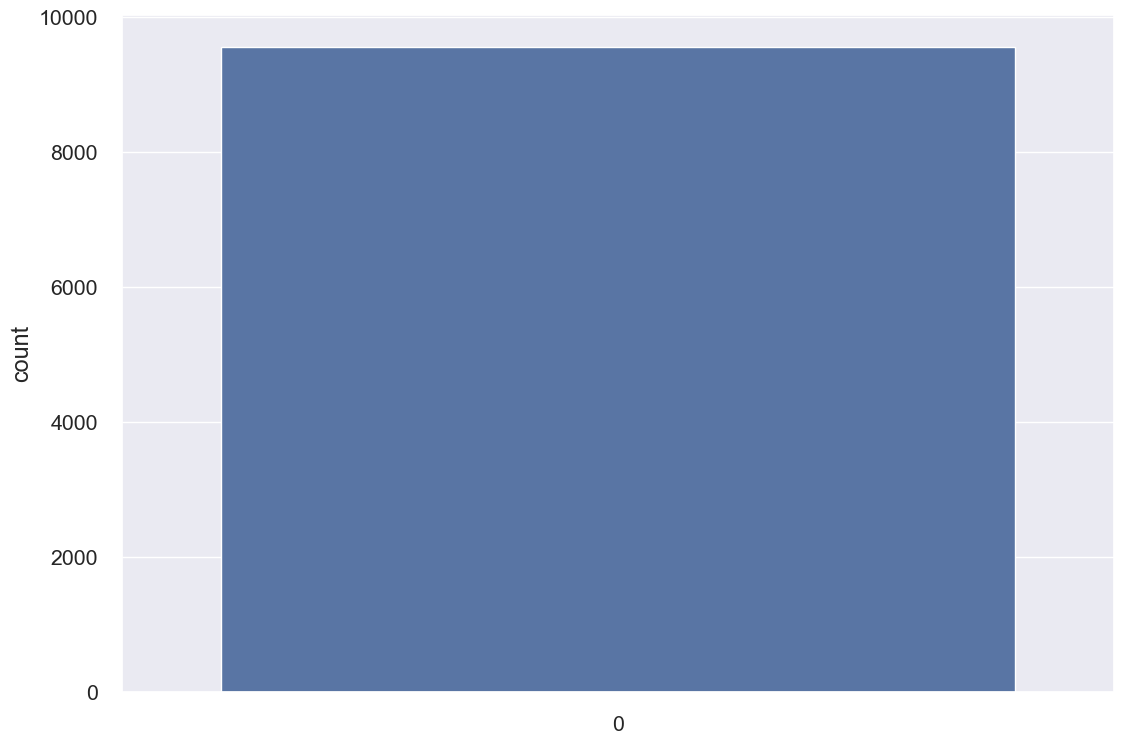

In [30]:
sns.countplot(df['ExoplanetCandidate'])


<Axes: ylabel='count'>

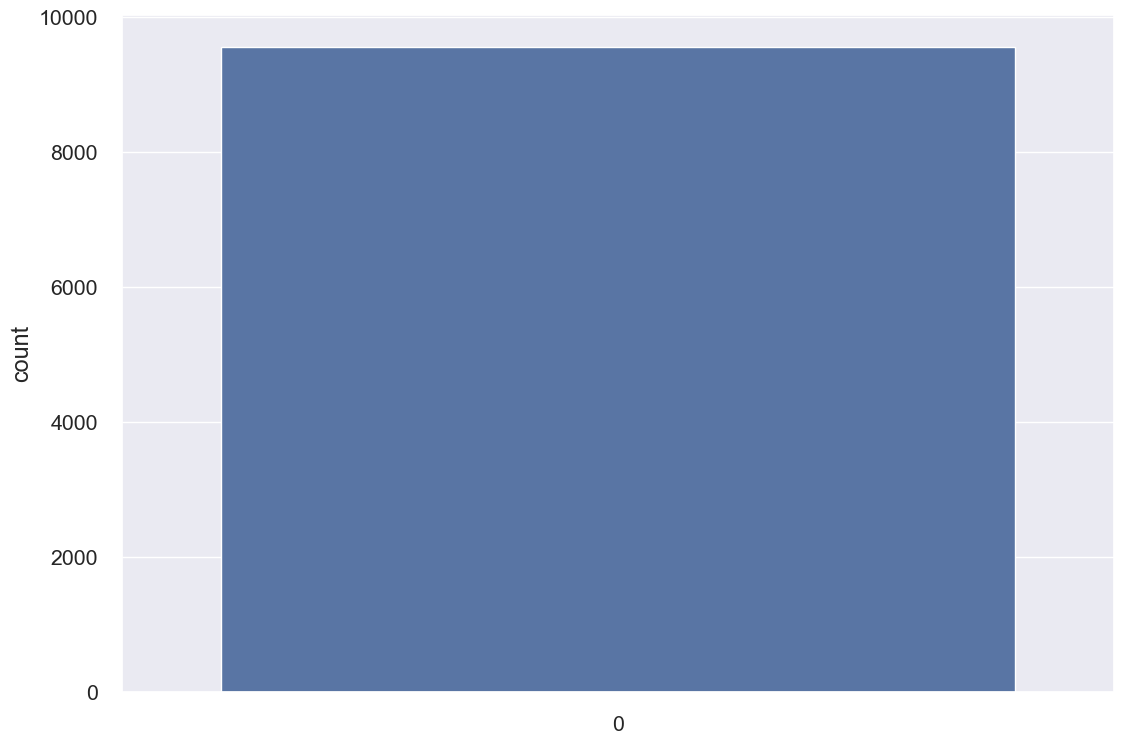

In [31]:
sns.countplot(df['ExoplanetConfirmed'])

## Dropping Columns

In [32]:
df.drop(columns=['kepler_name','kepoi_name','koi_teq_err1',
                 'kepid','koi_disposition','koi_pdisposition',
                 'koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co',
                 'koi_fpflag_ec','koi_tce_delivname',
                 'koi_teq_err2'], inplace=True)

In [33]:
df.head()

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


## Imputing Missing Values

In [34]:
df.dropna(inplace=True)
df.shape

(7803, 39)

## Cleaning the dataset


In [44]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,ExoplanetCandidate,ExoplanetConfirmed
0,1.000,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
1,0.969,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1.0,2.0
2,0.000,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1.0,1.0
3,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0.0,0.0
4,1.000,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1580.0,4.6,-4.6,29.35,7.70,-2.57,2088.0,4500.53,3406.38,-1175.26,453.3,1.0,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0.0,0.0
9560,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,1585.81,1537.86,-502.22,10.6,1.0,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1.0,1.0
9561,0.021,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,104.0,14.7,-14.7,1.07,0.36,-0.11,2218.0,5713.41,5675.74,-1836.94,12.3,1.0,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0.0,0.0
9562,0.092,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.0,52.7,-52.7,19.30,0.55,-4.68,557.0,22.68,2.07,-10.95,14.0,1.0,4989.0,39.0,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998,1.0,1.0


In [36]:
train, test = train_test_split(df, test_size=.15)
data = df.drop(columns=['ExoplanetConfirmed'])
train = train.drop(columns=['ExoplanetConfirmed'])
test = test.drop(columns=['ExoplanetConfirmed'])
target_trn = train.pop('ExoplanetCandidate')
target_tst = test.pop('ExoplanetCandidate')

In [37]:
train.shape, target_trn.shape, test.shape, target_tst.shape

((6632, 37), (6632,), (1171, 37), (1171,))

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6632 entries, 7379 to 1331
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          6632 non-null   float64
 1   koi_period         6632 non-null   float64
 2   koi_period_err1    6632 non-null   float64
 3   koi_period_err2    6632 non-null   float64
 4   koi_time0bk        6632 non-null   float64
 5   koi_time0bk_err1   6632 non-null   float64
 6   koi_time0bk_err2   6632 non-null   float64
 7   koi_impact         6632 non-null   float64
 8   koi_impact_err1    6632 non-null   float64
 9   koi_impact_err2    6632 non-null   float64
 10  koi_duration       6632 non-null   float64
 11  koi_duration_err1  6632 non-null   float64
 12  koi_duration_err2  6632 non-null   float64
 13  koi_depth          6632 non-null   float64
 14  koi_depth_err1     6632 non-null   float64
 15  koi_depth_err2     6632 non-null   float64
 16  koi_prad           66

In [39]:
score_auc = []
score_recall = []
oof_rf = np.zeros(len(train))
pred_rf = np.zeros(len(test))

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target_trn)):
    print('fold:', fold_, '  - Starting ...')
    trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind]
    y_train, y_val = target_trn.iloc[train_ind], target_trn.iloc[val_ind]
    
    rf = RandomForestClassifier(n_estimators=150, max_depth=5, criterion='gini', max_features=0.8, n_jobs= -1, random_state=32)
    rf.fit(trn_data, y_train)
    oof_rf[val_ind] = rf.predict_proba(val_data)[:, 1]
    y = rf.predict_proba(trn_data)[:, 1]
    print('val auc:' , roc_auc_score(y_val, oof_rf[val_ind]))
    print('val recall:' , recall_score(y_val, np.where(oof_rf[val_ind] > 0.5, 1, 0)))
   
    score_auc.append(roc_auc_score(y_val, oof_rf[val_ind]))
    score_recall.append(recall_score(y_val, np.where(oof_rf[val_ind] > 0.5, 1, 0)))
                        
    pred_rf += rf.predict_proba(test)[:, 1]/folds.n_splits
    
print(' Model auc: -------> ', np.mean(score_auc))
print(' Model recall: -------> ', np.mean(score_recall))

fold: 0   - Starting ...
val auc: 0.9901254334615964
val recall: 0.9450741063644289
fold: 1   - Starting ...
val auc: 0.9846522638330788
val recall: 0.9476896251089799
fold: 2   - Starting ...
val auc: 0.9854639051818026
val recall: 0.9424083769633508
 Model auc: ------->  0.9867472008254926
 Model recall: ------->  0.9450573694789198


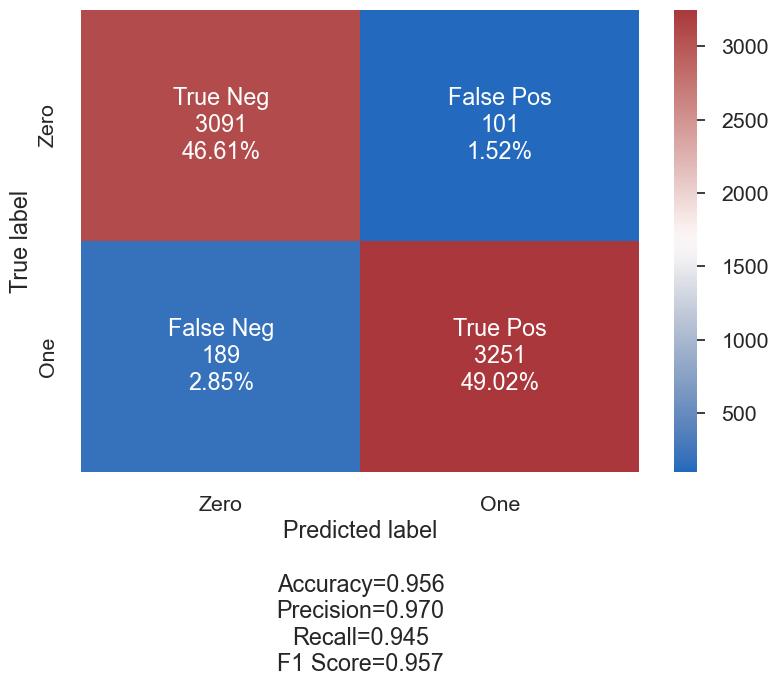

In [40]:
oof_nn_rd = np.where(oof_rf >= 0.5, 1, 0)
cf_matrix = confusion_matrix(target_trn, oof_nn_rd) 

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
plt.style.use('seaborn-poster')
sns.set(font_scale=1.4)
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='vlag', figsize=(9, 6))

In [41]:
roc_auc_score(target_tst, pred_rf)

0.9924490011069528

In [42]:

from sklearn.linear_model import LogisticRegression
score_auc = []
score_recall = []
oof_lr = np.zeros(len(train))
pred_lr = np.zeros(len(test))

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold_ , (train_ind, val_ind) in enumerate(folds.split(train, target_trn)):
    print('fold:', fold_, '  - Starting ...')
    trn_data, val_data = train.iloc[train_ind], train.iloc[val_ind]
    y_train, y_val = target_trn.iloc[train_ind], target_trn.iloc[val_ind]
    
    lr = LogisticRegression(C=1, max_iter=400, class_weight='balanced', random_state=32)
    lr.fit(trn_data, y_train)
    oof_lr[val_ind] = rf.predict_proba(val_data)[:, 1]
    y = lr.predict_proba(trn_data)[:, 1]
    print('val auc:' , roc_auc_score(y_val, oof_lr[val_ind]))
    print('val recall:' , recall_score(y_val, np.where(oof_lr[val_ind] >= 0.5, 1, 0)))
   
    score_auc.append(roc_auc_score(y_val, oof_lr[val_ind]))
    score_recall.append(recall_score(y_val, np.where(oof_lr[val_ind] >= 0.5, 1, 0)))
                        
    pred_lr += lr.predict_proba(test)[:, 1]/folds.n_splits
    
print(' Model auc: -------> ', np.mean(score_auc))
print(' Model recall: -------> ', np.mean(score_recall))

fold: 0   - Starting ...


C:\Users\Harishankar Menon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


val auc: 0.9947774502311024
val recall: 0.9505813953488372
fold: 1   - Starting ...


C:\Users\Harishankar Menon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


val auc: 0.9980096990209995
val recall: 0.9651162790697675
fold: 2   - Starting ...


C:\Users\Harishankar Menon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


val auc: 0.9915399230881388
val recall: 0.9491279069767442
fold: 3   - Starting ...


C:\Users\Harishankar Menon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


val auc: 0.9888186192316105
val recall: 0.9549418604651163
fold: 4   - Starting ...
val auc: 0.9852247667128381
val recall: 0.938953488372093
 Model auc: ------->  0.991674091656938
 Model recall: ------->  0.9517441860465116


C:\Users\Harishankar Menon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
